In [1]:
import Pygor

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
--------------------------------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Welcome to Pygor!
--------------------------------------------------
To start the server:  pygor = Experimentfrontend()
New experiment created in: pygor.savedir

To take measurements use functions 
pygor.do2d, pygor.do1d and pygor.do0d.
To control use pygor.setval and pygor.getval.
Function syntax is identical to Igor!
--------------------------------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [2]:
pygor=Pygor.Experiment(savedata=True)

Name the experiment: first_device
False


### After creating a pygor object you can create a device handeling object using.

In [3]:
device1=Pygor.Device(pygor)

### The device initally contains the following gates an biases.

In [4]:
print(device1.get_gates())
print(device1.get_biases())

['c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16']
['c1', 'c2']


### This can be changed using the following. The minimum and maximum values of each dac must also be supplied.

In [5]:
device1.set_gates(["c4","c5","c6","c7","c8"],[-1500,-1500,-1500,-1500,-1500],[0,0,0,0,0])
device1.set_biases(["c1","c2"],[-200,-200,-200,-200,-200],[200,200,200,200,200])

### After this you can set which gates are plunger gates.

In [6]:
device1.set_plungers(["c6"])

['c6']

In [8]:
print(device1.get_gates())
print(device1.get_biases())
print(device1.get_plungers())

['c4', 'c5', 'c6', 'c7', 'c8']
['c1', 'c2']
['c6']


### You can rename the dac's by using the following.

In [9]:
device1.name_dacs()

Rename c4: barrier 1
Rename c5: gate 1
Rename c6: plunger
Rename c7: barrier 2
Rename c8: gate 2
Rename c1: bias main
Rename c2: bias 2


### Doing this you can directly control the dac channel using its new label like in the examples below.

In [10]:
device1.getval("barrier 1")

-300.0

In [11]:
device1.setval("plunger",-400)

-400.0

C:\Users\Dominic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


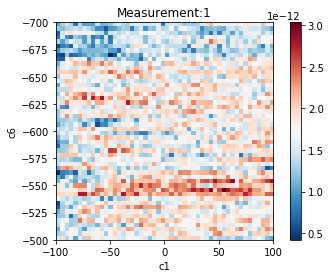

In [12]:
data = device1.do2d("plunger",-700,-500,50,"bias main",-100,100,50)

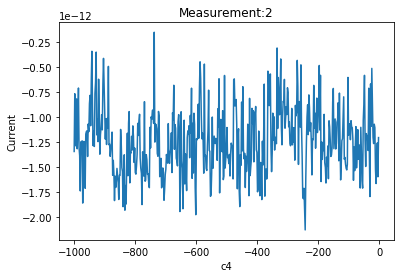

In [13]:
data1 = device1.do1d("barrier 1",-1000,0,500)

### You can make as many device objects as you need for example here the user creates a charge sensor.

In [14]:
qpc=Pygor.Device(pygor)

In [15]:
qpc.set_gates(["c8","c9","c10"],[-1500,-1500,-1500],[0,0,0])
qpc.set_biases(["c2"],[-200],[200])

qpc.set_plungers(["c9"])

['c9']

### Device objects can have the same labels applied to different dac channels

In [16]:
qpc.name_dacs()

Rename c8: gate 2
Rename c9: plunger
Rename c10: barrier 1
Rename c2: qpc bias


### In the do2d example below 'barrier 1' referes to 2 different dacs while 'gate 2' does not.

C:\Users\Dominic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


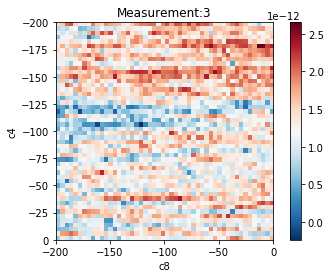

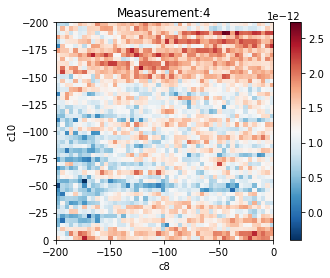

In [17]:
data2 = device1.do2d("barrier 1",-200,0,50,"gate 2",-200,0,50)
data3 = qpc.do2d("barrier 1",-200,0,50,"gate 2",-200,0,50)

### And in the below do1d example taking a trace with the 'plunger' label takes a trace with 2 different channels.

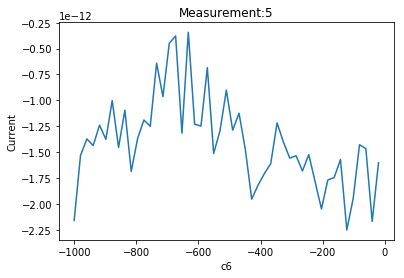

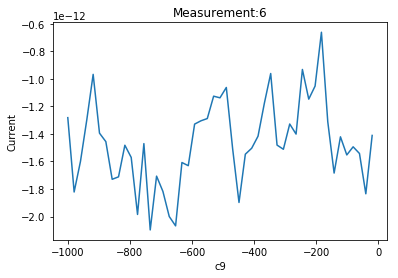

In [18]:
data4 = device1.do1d("plunger",-1000,0,50)
data5 = qpc.do1d("plunger",-1000,0,50)

### You can also bulk set the gates relevent to the device in a similar way to set_params() allowing you to only focus on the relevent gates for the device simplifying code. (Note that device1 and qpc share a dac so dac 'c8' gets changed twice)

In [19]:
qpc.set_gate_params([-200,-250,-200])

[100.0,
 -1,
 -1,
 0.0,
 -350.0,
 0.0,
 -450.0,
 -200.0,
 -250.0,
 -200.0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [20]:
device1.set_gate_params([-300,-350,-400,-450,-500])

[100.0,
 -1,
 -1,
 -300.0,
 -350.0,
 -400.0,
 -450.0,
 -500.0,
 -250.0,
 -200.0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

### You can also save a device object for later use. Doing the below will save the object in the pygor folder for the experiment if savedata=True and if not will save it in the Pygor root folder 'c:/Pygor'.

In [21]:
qpc.save("main_qpc")

In [22]:
del qpc

In [23]:
qpc

NameError: name 'qpc' is not defined

### To load a saved device pass the file path and your pygor object in the manner below.

In [24]:
qpc = Pygor.Device.load("C://Pygor//first_device//main_qpc.pkl",pygor)

In [25]:
qpc

### After being loaded the device object can be used as before.

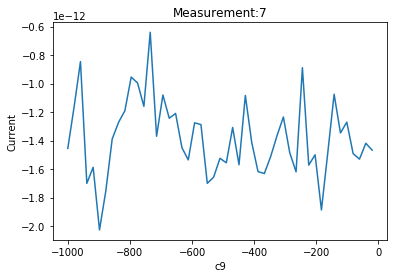

In [26]:
data6 = qpc.do1d("plunger",-1000,0,50)